# TNSE with SHAP

#### Import libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from numpy import loadtxt
from numpy import concatenate
from numpy import array
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

#### Load data

In [5]:
php_shap = loadtxt('../data/PHP-shap.csv', delimiter=',')
ruby_shap = loadtxt('../data/ruby-shap.csv', delimiter=',')
c_shap = loadtxt('../data/c-shap.csv', delimiter=',')
py_shap = loadtxt('../data/python-shap.csv', delimiter=',')
scala_shap = loadtxt('../data/scala-shap.csv', delimiter=',')
java_shap = loadtxt('../data/java-shap.csv', delimiter=',')

In [6]:
#php_shap = loadtxt('../data/php-shap-2.csv', delimiter=',')
#ruby_shap = loadtxt('../data/ruby-shap-2.csv', delimiter=',')
#c_shap = loadtxt('../data/c-shap-2.csv', delimiter=',')
#py_shap = loadtxt('../data/python-shap-2.csv', delimiter=',')
#r_shap = loadtxt('../data/r-shap-2.csv', delimiter=',')
#java_shap = loadtxt('../data/java-shap-2.csv', delimiter=',')

#### Preparing data

In [7]:
# x and y lists (features and target)
x = []
aux = []

In [8]:
x.append(php_shap)
x.append(ruby_shap)
x.append(c_shap)
x.append(py_shap)
x.append(scala_shap)
x.append(java_shap)

In [9]:
aux.append(0)
aux.append(1)
aux.append(2)
aux.append(3)
aux.append(4)
aux.append(5)

y = array(aux)

In [10]:
len(x[2])

16830128

#### TNSE

In [168]:
tsne = TSNE(n_components=3, 
            init='pca', 
            verbose=1, 
            perplexity=50, 
            n_iter=250, 
            random_state=0)

In [169]:
X_2d = tsne.fit_transform(x)

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.028s...
[t-SNE] Computed neighbors for 6 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.642220
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


In [170]:
X_2d

array([[-543.7392 , 1943.0338 ,   88.82339],
       [3364.27   ,  -71.80619,  -41.93495],
       [-633.8864 , -384.68207, -411.81076],
       [-558.4831 , -631.5044 ,  812.7488 ],
       [-860.55005, -452.48007, -165.4272 ],
       [-755.6967 , -408.89127, -305.82498]], dtype=float32)

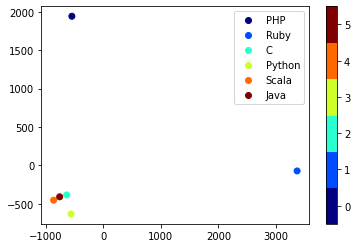

In [171]:
# plot the result
vis_x = X_2d[:, 0]
vis_y = X_2d[:, 1]
classes = ['PHP', 'Ruby', 'C', 'Python', 'Scala', 'Java']
scatter = plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("jet", 6))
#plt.scatter(vis_x, vis_y, c=y, cmap=plt.cm.get_cmap("rainbow", 6))
plt.colorbar(ticks=range(6))
plt.clim(-0.5, 5.5)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('../reports/languages-tnse.png')
plt.show()

#### That's all folks!!!